In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [5]:
X = iris.data[:,[2,3]]
y = iris.target

In [6]:
np.unique(y)

array([0, 1, 2])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
s = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [14]:
X_train, X_test, y_train, y_test = s

In [16]:
y_train

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [17]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [18]:
np.bincount(y_train)

array([35, 35, 35])

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)

In [21]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

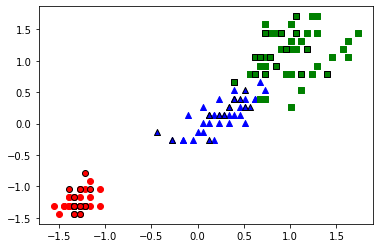

In [24]:
idx0 = y_train==0 ; idx1 = y_train==1 ; idx2 = y_train==2
plt.scatter(X_train_std[idx0,0], X_train_std[idx0,1], marker='o', color='red')
plt.scatter(X_train_std[idx1,0], X_train_std[idx1,1], marker='^', color='blue')
plt.scatter(X_train_std[idx2,0], X_train_std[idx2,1], marker='s', color='green')
idx0 = y_test==0 ; idx1 = y_test==1 ; idx2 = y_test==2
plt.scatter(X_test_std[idx0,0], X_test_std[idx0,1], marker='o', color='red',
            edgecolor='black', linewidth=1)
plt.scatter(X_test_std[idx1,0], X_test_std[idx1,1], marker='^', color='blue',
            edgecolor='black', linewidth=1)
plt.scatter(X_test_std[idx2,0], X_test_std[idx2,1], marker='s', color='green',
            edgecolor='black', linewidth=1)

In [25]:
from sklearn.linear_model import Perceptron

In [26]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1).fit(X_train_std,y_train)

In [27]:
y_pred = ppn.predict(X_test_std)

In [29]:
(y_test != y_pred).sum()

1

In [30]:
ppn.score(X_test_std, y_test)

0.9777777777777777

In [31]:
len(y_test)

45

In [32]:
from myplot import plot_decision_regions

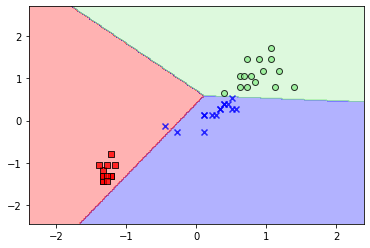

In [33]:
plot_decision_regions(X_test_std, y_test, ppn)

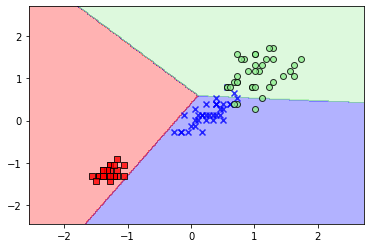

In [34]:
plot_decision_regions(X_train_std, y_train, ppn)

In [35]:
ppn.score(np.vstack((X_train_std,X_test_std)), np.hstack((y_train,y_test)))

0.9533333333333334

In [36]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr1 = LogisticRegression(C=1.0, random_state=1)
lr1.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

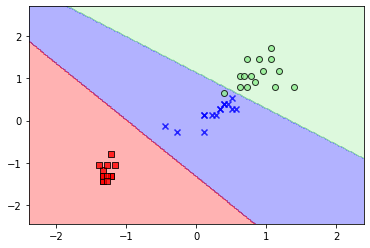

In [39]:
plot_decision_regions(X_test_std, y_test, lr1)

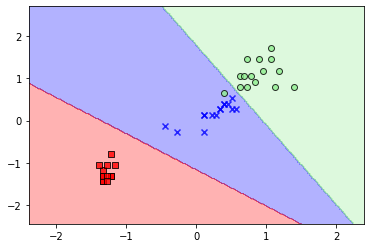

In [40]:
lr2 = LogisticRegression(C=100.0, random_state=1).fit(X_train_std, y_train)
plot_decision_regions(X_test_std, y_test, lr2)

In [58]:
y_pred = lr2.predict(X_test_std)
idx = y_pred != y_test

In [59]:
X_test_std[idx]

array([[0.39625036, 0.65926081]])

In [63]:
lr2.predict_proba(X_test_std)[idx,:]

array([[3.79431985e-06, 9.04401285e-01, 9.55949212e-02]])

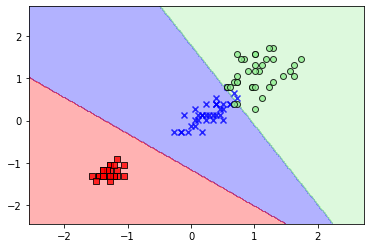

In [41]:
plot_decision_regions(X_train_std, y_train, lr2)

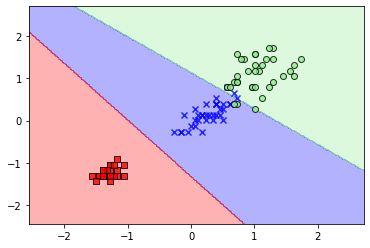

In [42]:
plot_decision_regions(X_train_std, y_train, lr1)

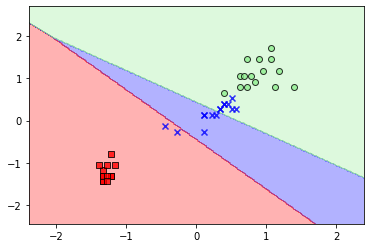

In [46]:
lr3 = LogisticRegression(C=0.01, random_state=1).fit(X_train_std, y_train)
plot_decision_regions(X_test_std, y_test, lr3)

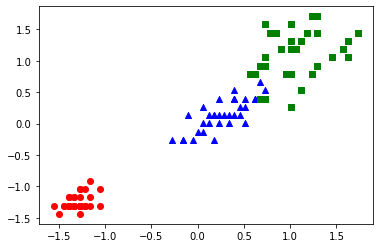

In [47]:
idx0 = y_train==0 ; idx1 = y_train==1 ; idx2 = y_train==2
plt.scatter(X_train_std[idx0,0], X_train_std[idx0,1], marker='o', color='red')
plt.scatter(X_train_std[idx1,0], X_train_std[idx1,1], marker='^', color='blue')
plt.scatter(X_train_std[idx2,0], X_train_std[idx2,1], marker='s', color='green')

In [48]:
from sklearn.svm import SVC
svm1 = SVC(kernel='linear', C=1.0, random_state=1).fit(X_train_std, y_train)

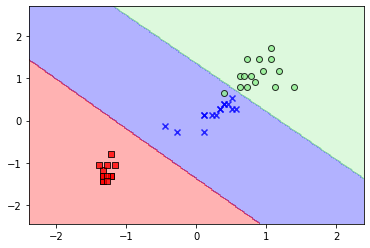

In [49]:
plot_decision_regions(X_test_std, y_test, svm1)

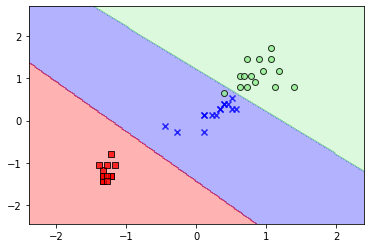

In [66]:
svm2 = SVC(kernel='linear', C=2.0, random_state=1).fit(X_train_std, y_train)
plot_decision_regions(X_test_std, y_test, svm2)

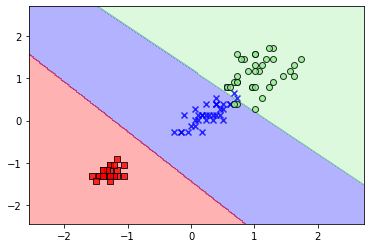

In [51]:
plot_decision_regions(X_train_std, y_train, svm2)

In [68]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor( X_xor[:,0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor, 1, -1)

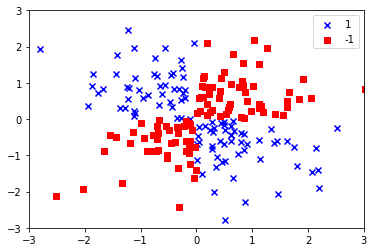

In [70]:
idx0 = y_xor == 1 ; idx1 = y_xor == -1
plt.scatter( X_xor[idx0,0], X_xor[idx0,1], color='blue', marker='x', label='1')
plt.scatter( X_xor[idx1,0], X_xor[idx1,1], color='red', marker='s', label='-1')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='best')

In [71]:
sc1 = SVC(kernel='rbf', gamma=0.1, random_state=1, C=10.0).fit(X_xor, y_xor)

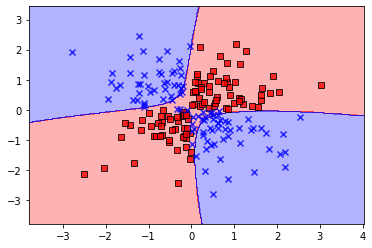

In [72]:
plot_decision_regions(X_xor, y_xor, sc1)

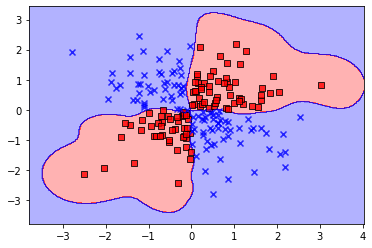

In [81]:
sc2 = SVC(kernel='rbf', gamma=3, random_state=1, C=100.0).fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, sc2)

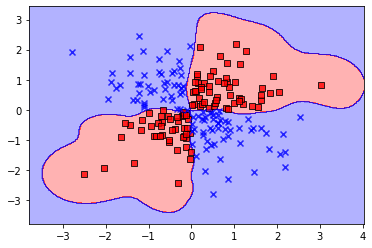

In [87]:
sc3 = SVC(kernel='rbf', gamma=3, random_state=1, C=100.0).fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, sc3)

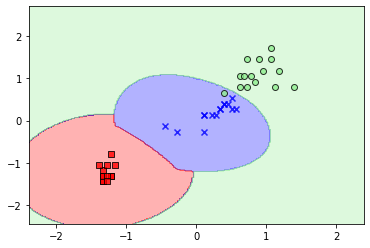

In [93]:
sc5 = SVC(kernel='rbf', gamma=1.0, C=1.0).fit(X_train_std, y_train)
plot_decision_regions(X_test_std, y_test, sc5)

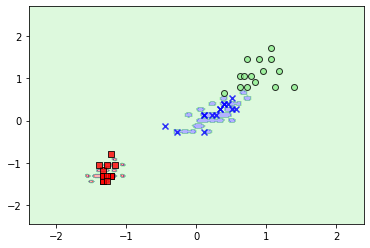

In [98]:
sc6 = SVC(kernel='rbf', gamma=1000.0, C=1.0).fit(X_train_std, y_train)
plot_decision_regions(X_test_std, y_test, sc6)

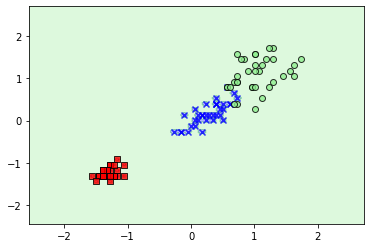

In [99]:
plot_decision_regions(X_train_std, y_train, sc6)

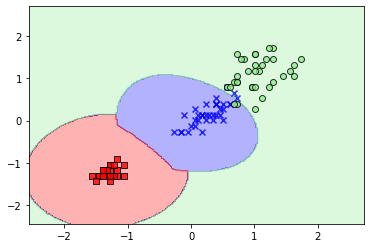

In [100]:
plot_decision_regions(X_train_std, y_train, sc5)

In [101]:
from sklearn.neighbors import KNeighborsClassifier

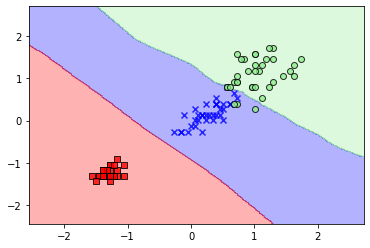

In [109]:
kn1 = KNeighborsClassifier(n_neighbors=50).fit(X_train_std,y_train)
plot_decision_regions(X_train_std, y_train, classifier=kn1)